Note: you may need to restart the kernel to use updated packages.
{'ăn vặt, ăn vặt vỉa hè': {'quận long biên': 10, 'quận hoàn kiếm': 67, 'quận đống đa': 108, 'quận cầu giấy': 81, 'quận ba đình': 61, 'quận bắc từ liêm': 13, 'quận nam từ liêm': 14, 'quận tây hồ': 5, 'quận hoàng mai': 11, 'quận thanh xuân': 27, 'quận hai bà trưng': 54, 'quận hà đông': 28}, 'đồ ăn sáng, đồ ăn sáng vỉa hè': {'quận long biên': 9, 'quận hoàn kiếm': 97, 'quận đống đa': 154, 'quận cầu giấy': 91, 'quận ba đình': 77, 'quận bắc từ liêm': 10, 'quận nam từ liêm': 16, 'quận tây hồ': 12, 'quận hoàng mai': 19, 'quận thanh xuân': 40, 'quận hai bà trưng': 121, 'quận hà đông': 28}, 'quán cơm văn phòng': {'quận long biên': 18, 'quận hoàn kiếm': 206, 'quận đống đa': 239, 'quận cầu giấy': 141, 'quận ba đình': 117, 'quận bắc từ liêm': 9, 'quận nam từ liêm': 32, 'quận tây hồ': 32, 'quận hoàng mai': 35, 'quận thanh xuân': 78, 'quận hai bà trưng': 149, 'quận hà đông': 52}, 'quán cơm bình dân, cơm mang đi': {'quận long biên': 5, 

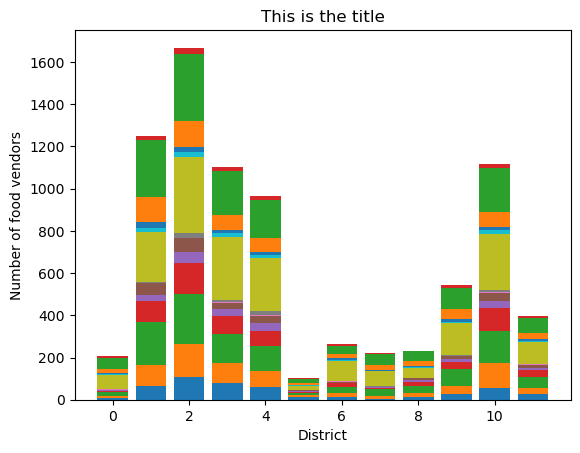

In [22]:
%pip install seaborn
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 


# Get delimiter of the CSV file
# This is to prevent the case fields in database are separated by something not commas
def get_delimiter_of_csv(path_to_file):
    with open(path_to_file, 'r') as data:
        delim = csv.Sniffer().sniff(data.readline())
        return delim.delimiter

delimiter = get_delimiter_of_csv("./raw_restaurant_categorized.csv")
raw_data = pd.read_csv("./raw_restaurant_categorized.csv", sep=delimiter)

list_dishtype = raw_data.columns[9::]
list_district = raw_data['location'].unique()

district_dishtype_count = {}
for dist in list_district:
    district_dishtype_count[dist] = {}
    for dish in list_dishtype:
        district_dishtype_count[dist][dish] = 0

    
# # so quan an vat via he tai quan ba dinh => so quan X tai quan Y
for dish_type in list_dishtype:
    tmpGr = raw_data.groupby(['location', dish_type])
    for location_dishtype_pair, group in tmpGr:
        if location_dishtype_pair[1] == 'x': # this location serves this dishtype
            district_dishtype_count[location_dishtype_pair[0]][dish_type] = len(group)

# print(district_dishtype_count)

# fig, axs = plt.subplots(len(list_district), figsize=(100,100))
# count = 0
# for dist in list_district:
#     names = list(district_dishtype_count[dist].keys())
#     values = list(district_dishtype_count[dist].values())
#     axs[count].barh(range(len(names)), values, tick_label=names)
#     count+=1

# print("================")
dishtype_district_count = {}
for dish in list_dishtype:
    dishtype_district_count[dish] = {}
    for dist in list_district:
        dishtype_district_count[dish][dist] = 0

for dish in list_dishtype:
    for dist in list_district:
        dishtype_district_count[dish][dist] += district_dishtype_count[dist][dish]

# print(dishtype_district_count)
    
# fig, axs = plt.subplots(len(list_dishtype), figsize=(50,50))
# count = 0
# for dish in list_dishtype:
#     names = list(dishtype_district_count[dish].keys())
#     values = list(dishtype_district_count[dish].values())
#     axs[count].barh(range(len(names)), values, tick_label=names)
#     axs[count].set_title('Number of food vendor serving '+ dish+ ' in districts in Hanoi')
#     count+=1

print(len(dishtype_district_count))

# Stacked barchart
y_axes = []
for dish in list_dishtype:
    values = list(dishtype_district_count[dish].values())
    y_axes.append(np.array(values))

# print(y_axes)
# print(list_district)
x = np.arange(len(list_district))
plt.bar(x, y_axes[0])
holder = y_axes[0]
for i in range(1, len(y_axes)):
    plt.bar(x, y_axes[i], bottom=holder)
    holder += y_axes[i]

# plt.xticks(list_district)
plt.xlabel("District")
plt.ylabel("Number of food vendors")
plt.title("This is the title")
plt.show()
    